In [ ]:
.text:003B1020 var_80          = byte ptr -80h
.text:003B1020 argc            = dword ptr  4
.text:003B1020 argv            = dword ptr  8
.text:003B1020 envp            = dword ptr  0Ch
.text:003B1020
.text:003B1020                 sub     esp, 80h
.text:003B1026                 push    esi
.text:003B1027                 mov     esi, ds:printf
.text:003B102D                 push    offset Format   ; "enter password:\n"
.text:003B1032                 call    esi ; printf
.text:003B1034                 lea     eax, [esp+88h+var_80]
.text:003B1038                 push    eax
.text:003B1039                 push    offset aS       ; "%s"
.text:003B103E                 call    ds:scanf
.text:003B1044                 add     esp, 0Ch
.text:003B1047                 cmp     eax, 1
.text:003B104A                 jz      short loc_3B1056
.text:003B104C                 push    offset aNoPasswordSupp ; "no password supplied\n"
.text:003B1051                 call    esi ; printf
.text:003B1053                 add     esp, 4
.text:003B1056
.text:003B1056 loc_3B1056:                             ; CODE XREF: _main+2A↑j
.text:003B1056                 mov     al, [esp+84h+var_80]
.text:003B105A                 xor     edx, edx
.text:003B105C                 lea     ecx, [esp+84h+var_80]
.text:003B1060                 test    al, al
.text:003B1062                 jz      short loc_3B108E
.text:003B1064
.text:003B1064 loc_3B1064:                             ; CODE XREF: _main+50↓j
.text:003B1064                 movsx   eax, al
.text:003B1067                 lea     ecx, [ecx+1]
.text:003B106A                 add     edx, eax
.text:003B106C                 mov     al, [ecx]
.text:003B106E                 test    al, al
.text:003B1070                 jnz     short loc_3B1064
.text:003B1072                 cmp     edx, 1F8h
.text:003B1078                 jnz     short loc_3B108E
.text:003B107A                 push    offset aPasswordIsCorr ; "password is correct\n"
.text:003B107F                 call    esi ; printf
.text:003B1081                 add     esp, 4
.text:003B1084                 xor     eax, eax
.text:003B1086                 pop     esi
.text:003B1087                 add     esp, 80h
.text:003B108D                 retn
.text:003B108E ; ---------------------------------------------------------------------------
.text:003B108E
.text:003B108E loc_3B108E:                             ; CODE XREF: _main+42↑j
.text:003B108E                                         ; _main+58↑j
.text:003B108E                 push    offset aPasswordIsNotC ; "password is not correct\n"
.text:003B1093                 call    esi ; printf
.text:003B1095                 add     esp, 4
.text:003B1098                 xor     eax, eax
.text:003B109A                 pop     esi
.text:003B109B                 add     esp, 80h
.text:003B10A1                 retn
.text:003B10A1 _main           endp


Sau đây chúng ta cùng nhau phân tích đoạn code trên mà không cần Pseodu code thử nhe.

In [ ]:
.text:003B1020                 sub     esp, 80h
.text:003B1026                 push    esi
.text:003B1027                 mov     esi, ds:printf
.text:003B102D                 push    offset Format   ; "enter password:\n"
.text:003B1032                 call    esi ; printf
.text:003B1034                 lea     eax, [esp+88h+var_80]
.text:003B1038                 push    eax
.text:003B1039                 push    offset aS       ; "%s"
.text:003B103E                 call    ds:scanf
.text:003B1044                 add     esp, 0Ch
.text:003B1047                 cmp     eax, 1
.text:003B104A                 jz      short loc_3B1056
.text:003B104C                 push    offset aNoPasswordSupp ; "no password supplied\n"
.text:003B1051                 call    esi ; printf
.text:003B1053                 add     esp, 4
.text:003B1056
.text:003B1056 loc_3B1056:                             ; CODE XREF: _main+2A↑j
.text:003B1056                 mov     al, [esp+84h+var_80]
.text:003B105A                 xor     edx, edx
.text:003B105C                 lea     ecx, [esp+84h+var_80]
.text:003B1060                 test    al, al
.text:003B1062                 jz      short loc_3B108E

**## Initial**

Ở base address 003B1020, đoạn này thì chỉ là khởi tạo bộ nhớ stack ở biến cục bộ với giá trị 0x80 ( 128 ) bytes.

Sau đó chương trình sẽ tiếp tục thực hiện đoạn code in ra màn hình kêu bạn nhập password gì đó. Và ok cứ nhập thôi.
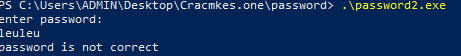


Hừm, sai à?

Thế đọc logic thôi ^^


Ở đoạn trên ở chỗ lea eax, [esp+88h+var_80]. Đoạn này cho phép bạn gán value được lưu tại địa chỉ [esp + 0x8] mà do chưa có nên mặc định =0;


add     esp, 0Ch --> Đoạn này chương trình chỉ dời con trỏ lên 0xC vị trí mà thôi


cmp eax,1 là so sánh với 1. Nếu eax = 0 thì nhảy vào hàm loc_3B1056. Và tất nhiên nó bằng 0 thiệt.



In [ ]:
loc_3B1056:                     CODE XREF: _main+2A↑j
.text:003B1056                 mov     al, [esp+84h+var_80]
.text:003B105A                 xor     edx, edx
.text:003B105C                 lea     ecx, [esp+84h+var_80]
.text:003B1060                 test    al, al
.text:003B1062                 jz      short loc_3B108E

`mov     al, [esp+84h+var_80]`

> `al = [esp + 0x4]  =0;`


xor     edx, edx

> reset thanh ghi edx.

`lea     ecx, [esp+84h+var_80]`

> lea (Load--effective-address) về khái niệm thì na ná *mov*  nhưng sẽ có chút thay đổi vì lea sẽ chơi với địa chỉ nữa nên nếu ta gán value tại address đó thì cho dù không tồn tại value thì chương trình vẫn không xảy ra lỗi trong khi mov thì có.


> ecx = 0;

`test al,al;`



> Nói nôm na, test chính là phép toán AND pha kè, và nếu bạn nghĩ al == al thì hoàn toàn sai vì al = 0 thì phép AND sẽ cho ra kết quả = 0 chứ không phải 1 đâu nhé. Và do ở trên ta đã gán =0 nên ở đây kết quả của lệnh test sẽ cho ra 0 và cờ **ZF** sáng đèn cho ra kết quả = 1.

`jz      short loc_3B108E`



> Vì test cho ra kết quả = 1 nên chỗ jz ( jump if zero) không thỏa điều kiện dẫn đến kết quả là không chạy vào và sẽ bypass nó.



In [ ]:
loc_3B1064:                    ; CODE XREF: _main+50↓j
.text:003B1064                 movsx   eax, al
.text:003B1067                 lea     ecx, [ecx+1]
.text:003B106A                 add     edx, eax
.text:003B106C                 mov     al, [ecx]
.text:003B106E                 test    al, al
.text:003B1070                 jnz     short loc_3B1064
.text:003B1072                 cmp     edx, 1F8h
.text:003B1078                 jnz     short loc_3B108E
.text:003B107A                 push    offset aPasswordIsCorr ; "password is correct\n"
.text:003B107F                 call    esi ; printf
.text:003B1081                 add     esp, 4
.text:003B1084                 xor     eax, eax
.text:003B1086                 pop     esi
.text:003B1087                 add     esp, 80h
.text:003B108D                 retn

Oke do đoạn code trên không thực hiện thì chúng ta sẽ cùng nhau đi xuống đây xem coi có gì nào?

>



In [ ]:
loc_3B1064:                    CODE XREF: _main+50↓j
.text:003B1064                 movsx   eax, al
.text:003B1067                 lea     ecx, [ecx+1]
.text:003B106A                 add     edx, eax
.text:003B106C                 mov     al, [ecx]
.text:003B106E                 test    al, al
.text:003B1070                 jnz     short loc_3B1064

Oke. Sau khi đọc sơ một đoạn thì tôi nhận ra rằng là cái chương trình này tự gọi chính nó chỉ sau vài dòng lệnh

Và tới đây thì tôi sẽ biết rằng đây là vòng loop chắc luôn nên ta sẽ ưu tiên xem coi nó làm gì nhé!

`movsx   eax, al`

> Do al = 0 trước đó nên lúc này gán vào eax thì vẫn  =0;


`.text:003B1067 lea ecx, [ecx+1]`


> Đoạn này gán value at address ecx+1 ( có khả năng là một kí tự or int)

`add     edx, eax`



> Việc edx += eax, tức có thể edx đóng vai trò là một tổng của các số bắt đầu từ base_addess + i;

`mov     al, [ecx]`


> Đoạn này cũng có thể hiểu là al = value ecx[1] vì trước đó mình gán rồi.


`test    al, al`


> Đoạn này AND hai thanh ghi al lại và tất nhiên sẽ =1 chỉ khi al = 0 thôi

`jnz     short loc_3B1064`

> Đoạn code này nghĩa là chỉ gọi lại hàm khi kết quả test khác 0. Cũng có nghĩa là nếu như al còn khác 0 thì chương trình sẽ luôn chạy.


Hừm tới đây tôi đã mườn tượng được rồi.

Thử tưởng tượng bằng pseodu code tự viết nhe.



```
string t = "abc";
int i = 0;
int sum =0;
while(t[i] != '\0')
{
    sum += (int)t[i];
    i++;
}
```
Tất nhiên tôi viết without debugging nên sẽ lỗi đó, chỉ viết đẻ đọc dễ hơn thôi.

Hừm...nếu như code tôi đúng thì đoạn này sẽ + hết kí tự ASCII lại vào sum luôn. Vậy sau đó làm gì nữa? Đọc code tiếp ^^







In [ ]:
cmp  edx, 1F8h
.text:003B1078                 jnz     short loc_3B108E
.text:003B107A                 push    offset aPasswordIsCorr ; "password is correct\n"
.text:003B107F                 call    esi ; printf
.text:003B1081                 add     esp, 4
.text:003B1084                 xor     eax, eax
.text:003B1086                 pop     esi

Đây là đoạn code sau vòng lặp trên. Và như bạn đã thấy đấy.

Rõ ràng ta thấy chương trình compare ( so sánh ) sum với 0x1F8 (504)

Và nếu nó không bằng thì sẽ nhảy vào hàm loc_3B108E. Tức là chương trình thông báo rằng pass bạn nhập sai.

Vậy bằng thì sau ?

**Chương trình sẽ in ra password is correct và ta đã giải được chương trình này.**

Ok. Vậy tóm tắt lại ta cần làm gì

1. Mở cmd lên và ăn viruss
2.Giỡn á, chạy chương trình trên máy ảo nhe ( mặc dù file an toàn 100% )
3. Sau đó nhập password bằng các kí tự sau cho khi + lại = 504.

Mình sẽ thử với ddddh xem.

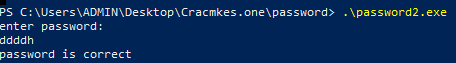


Ok. Vậy là đúng ha. Vậy còn mã khác thì sau ?

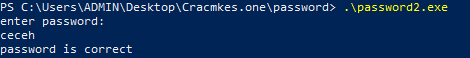


Oh vẫn đúng. Vậy kết lại nhập sau mà bạn cho nó tổng lại = 504 thì ok bạn pass ^^.